In [25]:
from bs4 import BeautifulSoup
import requests
import time
import openpyxl
import csv

excel_wb = openpyxl.Workbook()
sheet = excel_wb.active
sheet.title = "Used Cars Data"
sheet.append(["Name", "Price", "Kilometers", "Fuel Type", "Ownership", "Location"])

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}

urls = [
    "https://www.quikr.com/cars/used+cars+hyderabad+w773",
    "https://www.quikr.com/cars/used+cars+bangalore+w263",
    "https://www.quikr.com/cars/used+cars+mumbai+w1079",
    "https://www.quikr.com/cars/used+cars+chennai+w467",
    "https://www.quikr.com/cars/used+cars+delhi+w671",
    "https://www.quikr.com/cars/used+cars+pune+w1283",
    "https://www.quikr.com/cars/used+cars+Orissa+w1146908",
    "https://www.quikr.com/cars/used+cars+Haryana+w1146895",
    "https://www.quikr.com/cars/used+cars+kerala+w1146900",
    "https://www.quikr.com/cars/used+cars+Karnataka+w1146899",
    "https://www.quikr.com/cars/used+cars+Punjab+w1146910"    
]

def scrape_car_data():
    for url in urls:
        print(f"\nScraping: {url}")
        
        try:
            response = requests.get(url, headers=headers, timeout=10)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')
            
    
            cars = soup.find_all('div', class_="mdc-layout-grid__cell mdc-layout-grid__cell--span-4-desktop mdc-layout-grid__cell mdc-layout-grid__cell--span-12-phone") 
            
            if not cars:
                print("No cars found - check if the page structure changed")
                continue
                
            print(f"Found {len(cars)} cars")
            
            for car in cars:
                try:
                  
                    name_div = car.find("div", class_="car-info__footer")
                    name = name_div.find("h2").text.strip() if name_div and name_div.find("h2") else "N/A"
                    price_div = car.find("div", class_="price")
                    price = price_div.text.strip() if price_div else "N/A"
                    features_div = car.find('div', class_='prime-features')
                    features = features_div.get_text(strip=True) if features_div else "N/A"
                    
                    if features != "N/A":
                        try:
                            features_parts = [x.strip() for x in features.split('/')]
                            kilometers = features_parts[0] if len(features_parts) > 0 else "N/A"
                            fuel_type = features_parts[1] if len(features_parts) > 1 else "N/A"
                            ownership = features_parts[2] if len(features_parts) > 2 else "N/A"
                        except:
                            kilometers, fuel_type, ownership = "N/A", "N/A", "N/A"
                    else:
                        kilometers, fuel_type, ownership = "N/A", "N/A", "N/A"
                    location_div = car.find("div", class_="car-location")
                    location = location_div.text.strip() if location_div else "N/A"
                    
                    print(f"Found: {name} | {price} | {kilometers} | {fuel_type} | {ownership} | {location}")
                    
                   
                    sheet.append([name, price, kilometers, fuel_type, ownership, location])
                    
                    
                    with open("Pk_data.csv", mode="a", newline="", encoding="utf-8") as file:
                        writer = csv.writer(file)
                        writer.writerow([name, price, kilometers, fuel_type, ownership, location])
                        
                except Exception as e:
                    print(f"Error processing a car: {str(e)}")
                    continue
                    
            time.sleep(3) 
            
        except requests.exceptions.RequestException as e:
            print(f"Request failed for {url}: {str(e)}")
            continue


scrape_car_data()


try:
    excel_wb.save("Ck_data.xlsx")
    print("\nExcel file saved successfully!")
except Exception as e:
    print(f"Error saving Excel file: {str(e)}")

print("Scraping completed!")


Scraping: https://www.quikr.com/cars/used+cars+hyderabad+w773
Found 26 cars
Found: Maruti Suzuki Alto 800 LXi - 2021 | ₹3,20,000 | 35,704 kms | Petrol | 1st Owner | N/A
Found: Kia Seltos HTX IVT G - 2021 | ₹12,14,000 | 1,02,911 kms | Petrol | 1st Owner | N/A
Found: Renault Kwid CLIMBER 1.0 AMT - 2018 | ₹3,40,000 | 90,474 kms | Petrol | 1st Owner | N/A
Found: Hyundai Creta 1.6 SX Plus Auto Petrol - 2017 | ₹8,56,000 | 90,751 kms | Petrol | 1st Owner | N/A
Found: Maruti Suzuki S Cross Alpha 1.3 - 2016 | ₹6,08,000 | 1,35,350 kms | Diesel | 1st Owner | N/A
Found: N/A | N/A | N/A | N/A | N/A | N/A
Found: Ford Figo Aspire Titanium Plus 1.2 Ti VCT - 2020 | ₹5,88,000 | 90,539 kms | Petrol | 1st Owner | N/A
Found: Maruti Suzuki Dzire VDI AMT - 2019 | ₹6,76,000 | 99,623 kms | Diesel | 1st Owner | N/A
Found: Maruti Suzuki Alto 800 LXI O - 2019 | ₹3,10,000 | 58,658 kms | Petrol | 1st Owner | N/A
Found: Tata Tiago XZA 1.2 RTN - 2021 | ₹5,45,000 | 70,000 kms | Petrol | N/A | N/A
Found: Hyundai Santr

In [19]:
! pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [177]:

import pandas as pd

file_path = r"C:\Users\hp\Desktop\Analytics.space Project\Cleaned_Used_Car_Data (3).xlsx"

df = pd.read_excel(file_path)

print(df.head(285))

                                      Name    Price    Kilometers Fuel Type  \
0               Maruti Suzuki Alto 800 LXi   320000    35,704 kms    Petrol   
1                     Kia Seltos HTX IVT G  1214000  1,02,911 kms    Petrol   
2             Renault Kwid CLIMBER 1.0 AMT   340000    90,474 kms    Petrol   
3    Hyundai Creta 1.6 SX Plus Auto Petrol   856000    90,751 kms    Petrol   
4          Maruti Suzuki S Cross Alpha 1.3   608000  1,35,350 kms    Diesel   
..                                     ...      ...           ...       ...   
250                   Maruti Suzuki BREZZA   900000    22,000 kms    Petrol   
251              Hyundai Verna Fluidic New   580000    92,000 kms    Diesel   
252                 Toyota Corolla H2 1.8E   180000  1,50,000 kms    Petrol   
253                    Honda City 1.5 S MT   400000    61,000 kms    Petrol   
254                   Hyundai Creta 1.6 SX   650000    80,000 kms    Diesel   

     Ownership   Location  Ownership Count  Year   

In [95]:

df['Price'] = df['Price'].str.replace('₹', '', regex=False)
df['Price'] = df['Price'].str.replace(',', '', regex=False)

#Remove rows where Price is "Ask For Price"
df = df[df['Price'].str.lower() != 'ask for price']

#Convert remaining to integer
df['Price'] = df['Price'].astype(int)


In [41]:
print(df[df['Price'].isna()])

Empty DataFrame
Columns: [Name, Price, Kilometers, Fuel Type, Ownership, Location]
Index: []


In [45]:

df['Kilometers'] = df['Kilometers'].str.replace('kms', '', regex=False)
df['Kilometers'] = df['Kilometers'].str.replace(',', '', regex=False)
df['Kilometers'] = df['Kilometers'].str.strip()


df = df[df['Kilometers'].notna()]  # Drop NaNs
df = df[df['Kilometers'].str.isnumeric()] 


df['Kilometers'] = df['Kilometers'].astype(int)


In [47]:
print(df[['Kilometers']].head())

   Kilometers
0       35704
1      102911
2       90474
3       90751
4      135350


In [49]:
df['Brand'] = df['Name'].str.split().str[0]

In [45]:
import re


df['Year'] = df['Name'].apply(lambda x: re.search(r'\b(20\d{2})\b', x).group() if re.search(r'\b(20\d{2})\b', x) else None)


df = df[df['Year'].notna()]


df['Year'] = df['Year'].astype(int)

In [97]:
print(df[['Name', 'Brand', 'Year']].head())

                                    Name          Brand  Year
0             Maruti Suzuki Alto 800 LXi  Maruti Suzuki  2021
1                   Kia Seltos HTX IVT G            Kia  2021
2           Renault Kwid CLIMBER 1.0 AMT        Renault  2018
3  Hyundai Creta 1.6 SX Plus Auto Petrol        Hyundai  2017
4        Maruti Suzuki S Cross Alpha 1.3  Maruti Suzuki  2016


In [49]:
df['Brand'] = df['Name'].apply(lambda x: ' '.join(str(x).split()[:2]))

In [51]:
# For one-word brand:
df['Brand'] = df['Name'].apply(lambda x: str(x).split()[0])

In [53]:
print(df[['Name', 'Brand', 'Year']].head())

                                           Name    Brand  Year
0             Maruti Suzuki Alto 800 LXi - 2021   Maruti  2021
1                   Kia Seltos HTX IVT G - 2021      Kia  2021
2           Renault Kwid CLIMBER 1.0 AMT - 2018  Renault  2018
3  Hyundai Creta 1.6 SX Plus Auto Petrol - 2017  Hyundai  2017
4        Maruti Suzuki S Cross Alpha 1.3 - 2016   Maruti  2016


In [55]:
import re

df['Year'] = df['Name'].astype(str).apply(
    lambda x: re.search(r'\b(20\d{2})\b', x).group() if re.search(r'\b(20\d{2})\b', x) else None
)

df = df[df['Year'].notna()].copy()  # Drop rows where year is missing
df['Year'] = df['Year'].astype(int)

In [57]:
df['Name'] = df['Name'].astype(str).apply(
    lambda x: re.sub(r'\b(20\d{2})\b', '', x).strip()
)

In [59]:
df['Brand'] = df['Name'].apply(lambda x: ' '.join(x.split()[:2]))

In [61]:
print(df[['Name', 'Brand', 'Year']].head())

                                      Name          Brand  Year
0             Maruti Suzuki Alto 800 LXi -  Maruti Suzuki  2021
1                   Kia Seltos HTX IVT G -     Kia Seltos  2021
2           Renault Kwid CLIMBER 1.0 AMT -   Renault Kwid  2018
3  Hyundai Creta 1.6 SX Plus Auto Petrol -  Hyundai Creta  2017
4        Maruti Suzuki S Cross Alpha 1.3 -  Maruti Suzuki  2016


In [63]:
print(df['Fuel Type'].unique())

['Petrol' 'Diesel' nan 'Lpg' 'Cng' 'Electric' 'Hybrid']


In [65]:
df['Fuel Type'] = df['Fuel Type'].str.strip().str.title()

In [67]:
print(df['Ownership'].unique())

['1St Owner' nan '2Nd Owner' '3Rd Owner']


In [69]:
df['Ownership'] = df['Ownership'].str.strip().str.title()

In [71]:
df['Ownership Count'] = df['Ownership'].map({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
})

In [17]:
print(df['Location'].unique())

['Hyderabad' 'Bangalore' 'Mumbai' 'Chennai' 'Delhi' 'Pune' 'Orrissa'
 'Haryana' 'Kerala' 'Karnataka' 'Punjab']


In [73]:
df['Location'] = df['Location'].str.strip().str.title()

In [77]:

brand_list = [
    'Maruti Suzuki', 'Hyundai', 'Tata', 'Honda', 'Mahindra', 'Toyota',
    'Ford', 'Renault', 'Chevrolet', 'Volkswagen', 'Nissan', 'Skoda',
    'Datsun', 'BMW', 'Mercedes-Benz', 'Audi', 'Kia', 'MG', 'Jeep',
    'Land Rover', 'Jaguar', 'Volvo', 'Mini Cooper', 'Porsche', 'Lexus',
    'Fiat', 'Isuzu', 'Mitsubishi', 'Rolls Royce', 'Force Motors', 'Mahindra Renault'
]

In [79]:
def extract_brand(name):
    for brand in brand_list:
        if brand.lower() in name.lower():
            return brand
    return name.split()[0] 
df['Brand'] = df['Name'].apply(extract_brand)

In [81]:
print(df[['Name', 'Brand', 'Year']].head(10))

                                           Name          Brand  Year
0                  Maruti Suzuki Alto 800 LXi -  Maruti Suzuki  2021
1                        Kia Seltos HTX IVT G -            Kia  2021
2                Renault Kwid CLIMBER 1.0 AMT -        Renault  2018
3       Hyundai Creta 1.6 SX Plus Auto Petrol -        Hyundai  2017
4             Maruti Suzuki S Cross Alpha 1.3 -  Maruti Suzuki  2016
6   Ford Figo Aspire Titanium Plus 1.2 Ti VCT -           Ford  2020
7                 Maruti Suzuki Dzire VDI AMT -  Maruti Suzuki  2019
8                Maruti Suzuki Alto 800 LXI O -  Maruti Suzuki  2019
9                      Tata Tiago XZA 1.2 RTN -           Tata  2021
10                    Hyundai Santro Xing GLS -        Hyundai  2014


In [83]:
print(df.head(285))

                                        Name    Price    Kilometers Fuel Type  \
0               Maruti Suzuki Alto 800 LXi -   320000    35,704 kms    Petrol   
1                     Kia Seltos HTX IVT G -  1214000  1,02,911 kms    Petrol   
2             Renault Kwid CLIMBER 1.0 AMT -   340000    90,474 kms    Petrol   
3    Hyundai Creta 1.6 SX Plus Auto Petrol -   856000    90,751 kms    Petrol   
4          Maruti Suzuki S Cross Alpha 1.3 -   608000  1,35,350 kms    Diesel   
..                                       ...      ...           ...       ...   
281                   Maruti Suzuki BREZZA -   900000    22,000 kms    Petrol   
282              Hyundai Verna Fluidic New -   580000    92,000 kms    Diesel   
283                 Toyota Corolla H2 1.8E -   180000  1,50,000 kms    Petrol   
284                    Honda City 1.5 S MT -   400000    61,000 kms    Petrol   
285                   Hyundai Creta 1.6 SX -   650000    80,000 kms    Diesel   

     Ownership   Location  

In [89]:
# Remove trailing hyphens and extra spaces from the Name column
df['Name'] = df['Name'].str.replace(r'\s*-\s*$', '', regex=True).str.strip()

In [179]:
print(df.head(285))

                                      Name    Price    Kilometers Fuel Type  \
0               Maruti Suzuki Alto 800 LXi   320000    35,704 kms    Petrol   
1                     Kia Seltos HTX IVT G  1214000  1,02,911 kms    Petrol   
2             Renault Kwid CLIMBER 1.0 AMT   340000    90,474 kms    Petrol   
3    Hyundai Creta 1.6 SX Plus Auto Petrol   856000    90,751 kms    Petrol   
4          Maruti Suzuki S Cross Alpha 1.3   608000  1,35,350 kms    Diesel   
..                                     ...      ...           ...       ...   
250                   Maruti Suzuki BREZZA   900000    22,000 kms    Petrol   
251              Hyundai Verna Fluidic New   580000    92,000 kms    Diesel   
252                 Toyota Corolla H2 1.8E   180000  1,50,000 kms    Petrol   
253                    Honda City 1.5 S MT   400000    61,000 kms    Petrol   
254                   Hyundai Creta 1.6 SX   650000    80,000 kms    Diesel   

     Ownership   Location  Ownership Count  Year   

In [99]:
df.to_excel("Cleaned_Used_Car_Data.xlsx", index=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_24864\2579398479.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price.index, y=brand_price.values, palette='coolwarm')


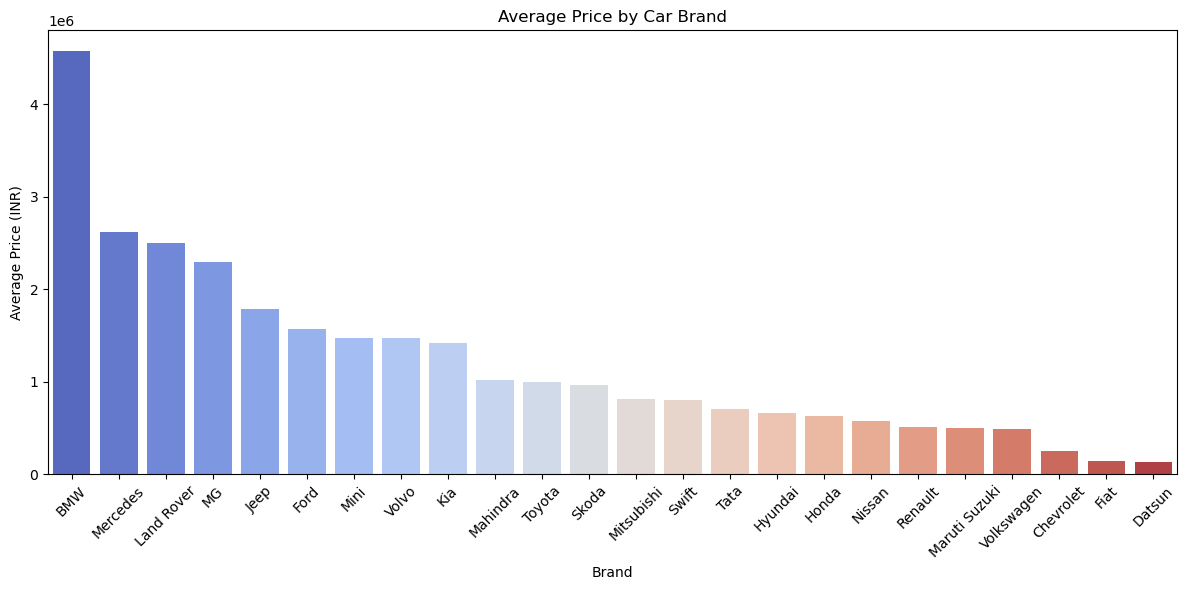

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

sns.barplot(x=brand_price.index, y=brand_price.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Price by Car Brand')
plt.ylabel('Average Price (INR)')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

In [103]:


cheap_cars = df[df['Price'] <= 300000][['Name', 'Brand', 'Price', 'Kilometers', 'Fuel Type', 'Location']]
print(cheap_cars.sort_values(by='Price'))

                                          Name          Brand   Price  \
173                    Tata Indica V2 DLS BSII           Tata   45000   
217       Hyundai Santro Xing XL eRLX Euro III        Hyundai   45000   
268                    Honda Accord 2.3 VTI AT          Honda   55000   
81                             Tata Indica LEi           Tata   75000   
143                 Maruti Suzuki Alto 800 Vxi  Maruti Suzuki   75000   
199                        Toyota Camry Toyota         Toyota   85000   
203                      Tata Indigo CS LS TDI           Tata   90000   
168  Fiat Linea Classic 1.3 L Multijet Classic           Fiat   95000   
221                     Hyundai Santro Xing GL        Hyundai   95000   
167          Maruti Suzuki Wagon R 1.0 Lxi ABS  Maruti Suzuki  109999   
77                        Hyundai i20 Asta 1.2        Hyundai  110000   
224                   Chevrolet Beat LT Diesel      Chevrolet  117000   
159                      Maruti Suzuki Wagon R  Mar

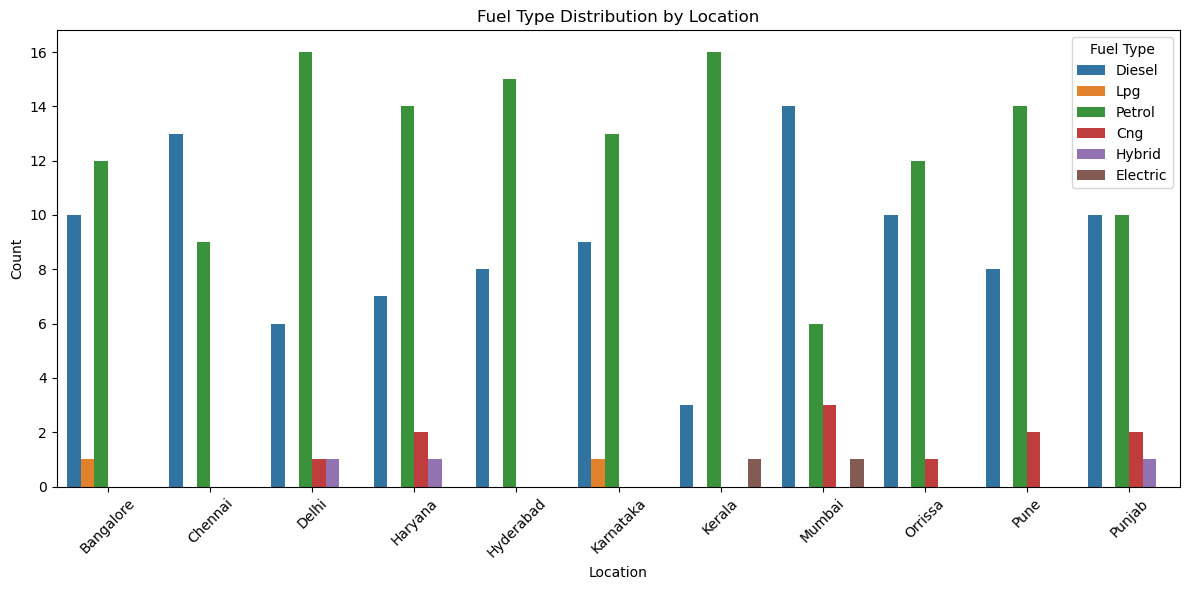

In [105]:


fuel_city = df.groupby(['Location', 'Fuel Type']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_city, x='Location', y='Count', hue='Fuel Type')
plt.xticks(rotation=45)
plt.title('Fuel Type Distribution by Location')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_24864\3349786638.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


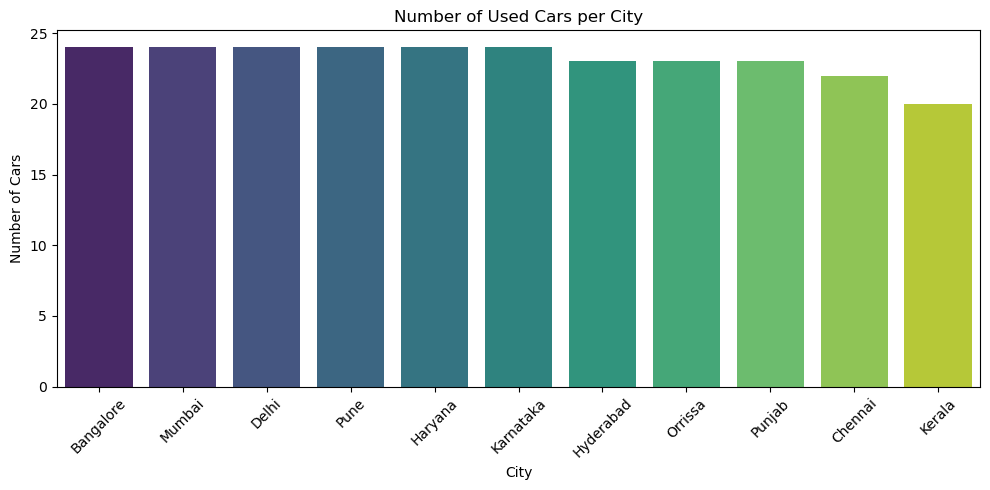

In [193]:


plt.figure(figsize=(10, 5))
location_counts = df['Location'].value_counts()

sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Used Cars per City')
plt.ylabel('Number of Cars')
plt.xlabel('City')
plt.tight_layout()
plt.show()

In [181]:
print(df.columns.tolist())

['Name', 'Price', 'Kilometers', 'Fuel Type', 'Ownership', 'Location', 'Ownership Count', 'Year', 'Brand']


In [183]:
print(df['Year'].head(10))
print(df['Year'].dtype)

0    2021
1    2021
2    2018
3    2017
4    2016
5    2020
6    2019
7    2019
8    2021
9    2014
Name: Year, dtype: int64
int64


In [197]:
df['Price_Lakhs'] = df['Price'] / 100000

In [199]:
print(df.columns)

Index(['Name', 'Price', 'Kilometers', 'Fuel Type', 'Ownership', 'Location',
       'Ownership Count', 'Year', 'Brand', 'Price_Lakhs'],
      dtype='object')


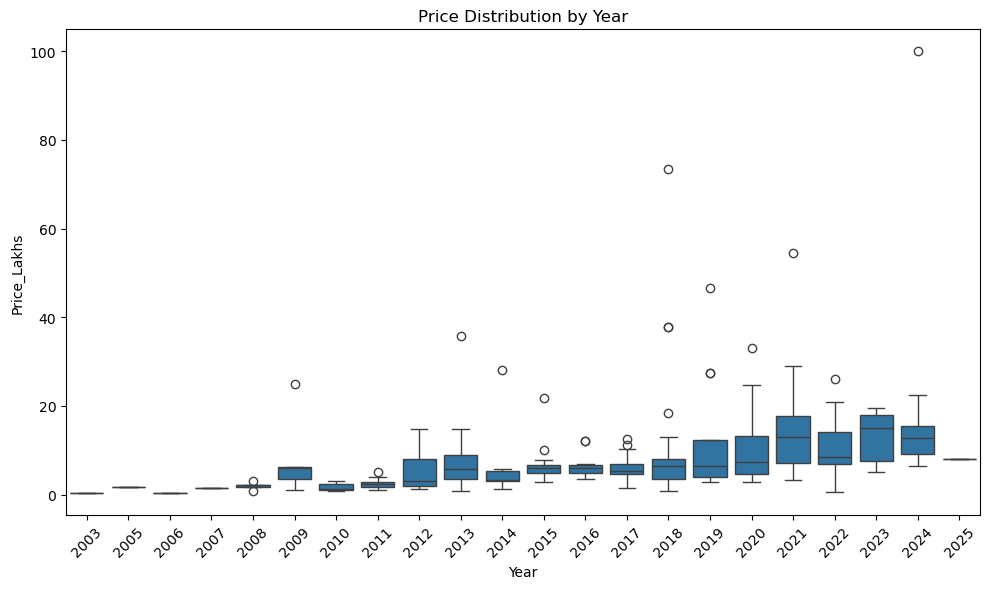

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Price_Lakhs'] = df['Price'] / 100000

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Price_Lakhs', data=df)
plt.title('Price Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

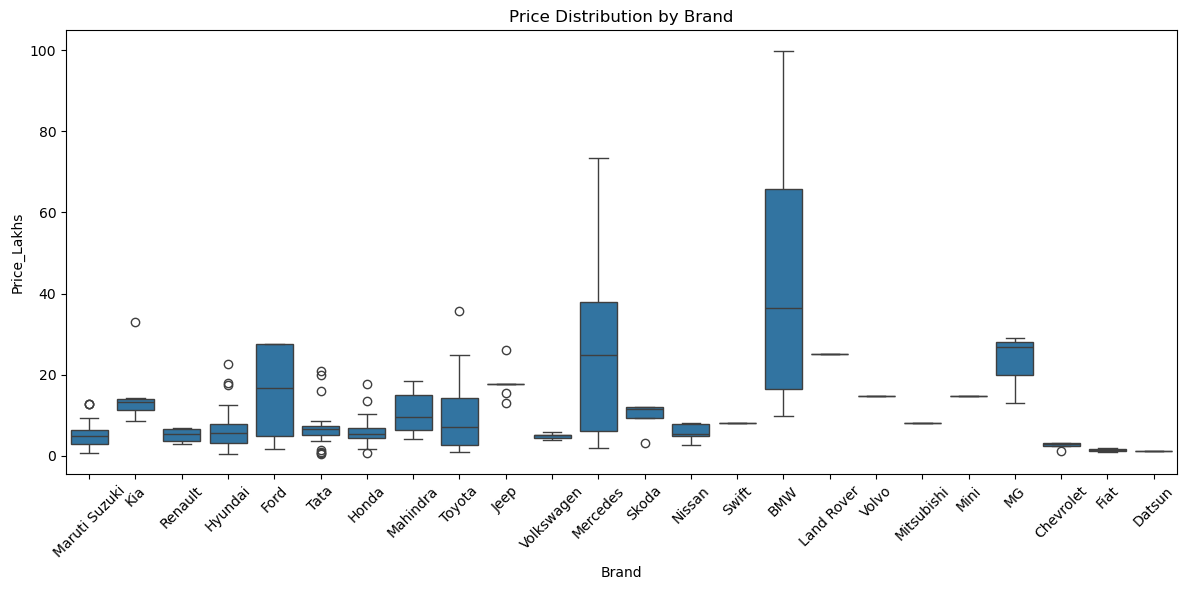

In [203]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price_Lakhs', data=df)
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


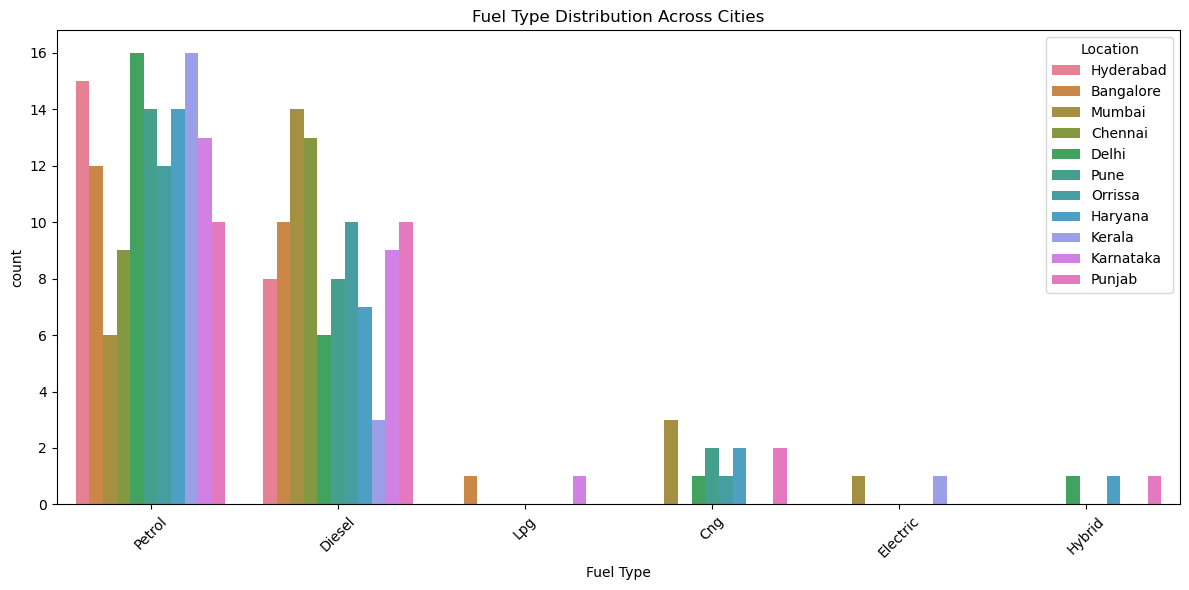

In [205]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Fuel Type', hue='Location', data=df)
plt.title('Fuel Type Distribution Across Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

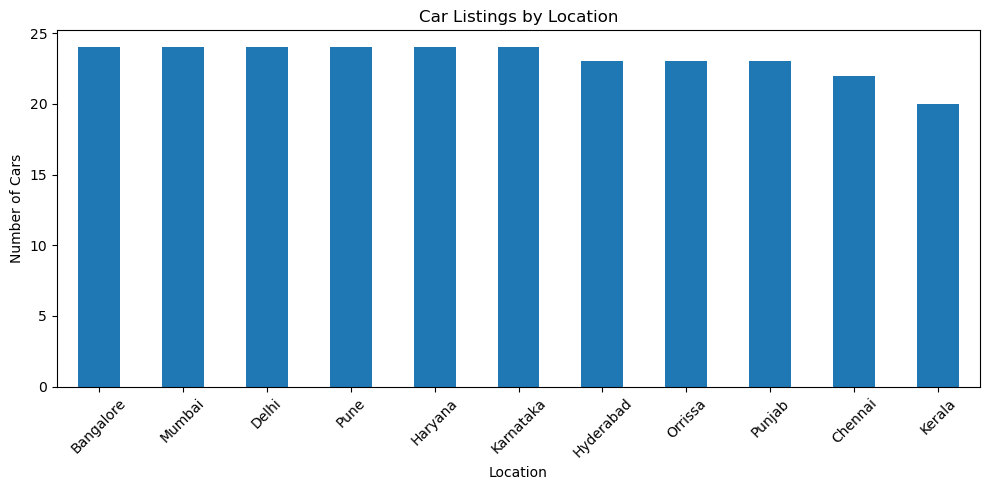

In [209]:
df['Location'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Car Listings by Location")
plt.xlabel("Location")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [211]:
df.to_excel('Used_Cars_Cleaned.xlsx', index=False)